<a href="https://colab.research.google.com/github/pesado-dev/DATA_SCIENCE/blob/main/BitcoinHistoricalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
dados = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')


In [3]:
dados

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
240338,1339738200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240339,1339738260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240340,1339738320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240341,1339738380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dados.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.403430e+05,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000
mean,1.332528e+09,5.312018,5.313410,5.310002,5.311576,17.758945,93.474428,5.311648
std,4.162872e+06,0.558897,0.559645,0.558487,0.559457,42.391848,235.410322,0.559390
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000,3.800000
25%,1.328923e+09,4.970000,4.970000,4.970000,4.970000,1.781115,10.126582,4.970000
50%,1.332528e+09,5.100000,5.100000,5.100000,5.100000,6.000000,31.118813,5.100000
75%,1.336133e+09,5.580000,5.580000,5.580000,5.580000,18.600000,95.699308,5.580000
max,1.339738e+09,7.380000,7.380000,7.380000,7.380000,859.927860,5073.574374,7.380000


In [5]:
# Converter a coluna 'Timestamp' para o formato datetime
dados['Timestamp'] = pd.to_datetime(dados['Timestamp'])


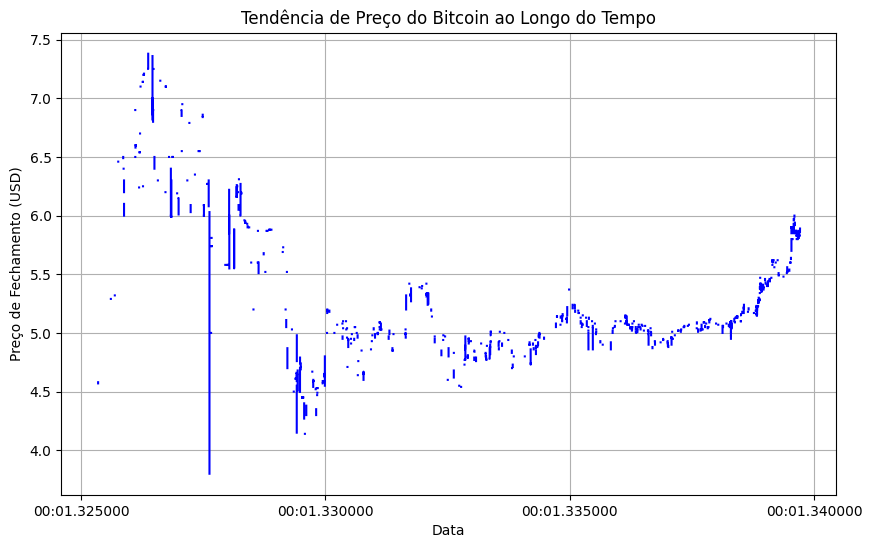

In [6]:
# 1. Tendência de Preço ao Longo do Tempo
plt.figure(figsize=(10, 6))
plt.plot(dados['Timestamp'], dados['Close'], color='blue')
plt.title('Tendência de Preço do Bitcoin ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.show()


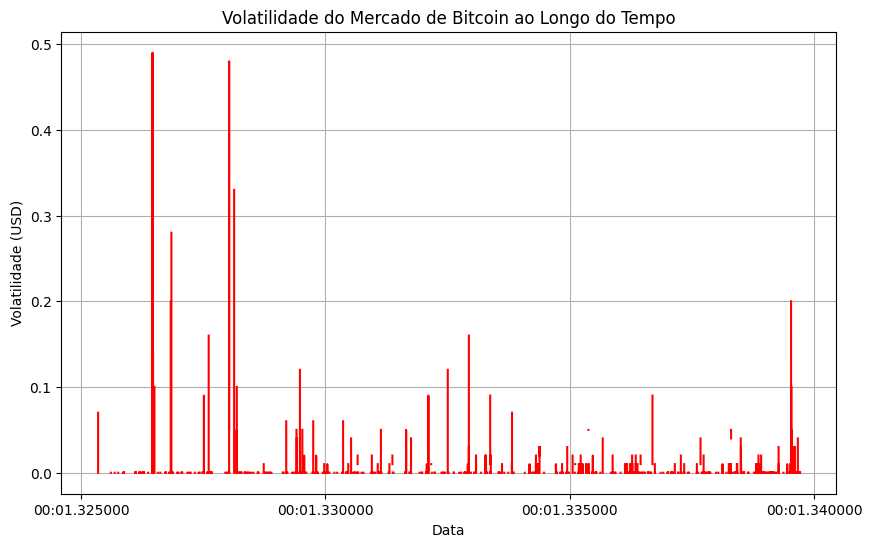

In [7]:
# 2. Volatilidade do Mercado
dados['Volatilidade'] = dados['High'] - dados['Low']
plt.figure(figsize=(10, 6))
plt.plot(dados['Timestamp'], dados['Volatilidade'], color='red')
plt.title('Volatilidade do Mercado de Bitcoin ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volatilidade (USD)')
plt.grid(True)
plt.show()


In [8]:
# Calcular a correlação entre diferentes colunas do DataFrame 'dados'
correlacao_close_open = dados['Close'].corr(dados['Open'])
correlacao_close_volume = dados['Close'].corr(dados['Volume_(BTC)'])

print("Correlação entre Close e Open:", correlacao_close_open)
print("Correlação entre Close e Volume_(BTC):", correlacao_close_volume)



Correlação entre Close e Open: 0.9994898910972125
Correlação entre Close e Volume_(BTC): -0.03602201175567134


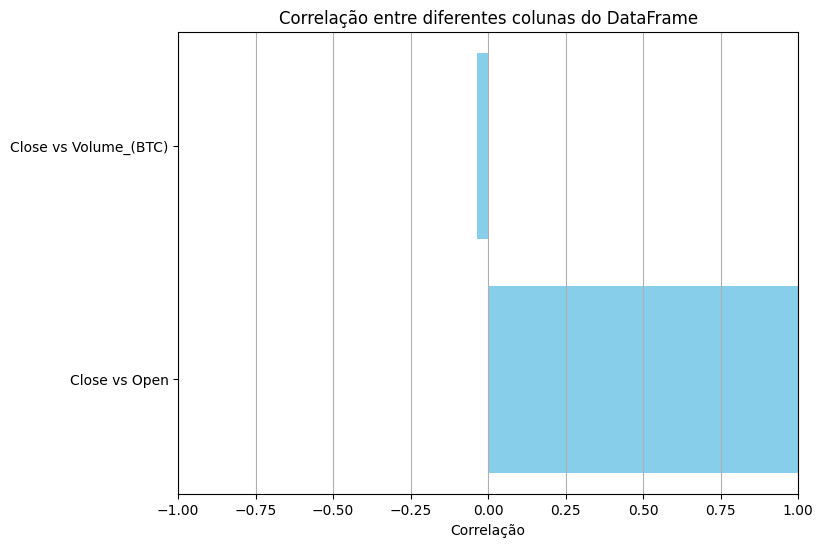

In [9]:
import matplotlib.pyplot as plt

# Calcular a correlação entre diferentes colunas do DataFrame 'dados'
correlacao_close_open = dados['Close'].corr(dados['Open'])
correlacao_close_volume = dados['Close'].corr(dados['Volume_(BTC)'])

# Criar uma lista com os nomes das colunas
colunas = ['Close vs Open', 'Close vs Volume_(BTC)']

# Criar uma lista com os valores de correlação
valores_correlacao = [correlacao_close_open, correlacao_close_volume]

# Criar o gráfico de barras horizontal
plt.figure(figsize=(8, 6))
plt.barh(colunas, valores_correlacao, color='skyblue')
plt.xlabel('Correlação')
plt.title('Correlação entre diferentes colunas do DataFrame')
plt.xlim(-1, 1)  # Definir os limites do eixo x de -1 a 1
plt.grid(axis='x')  # Adicionar grade apenas no eixo x
plt.show()


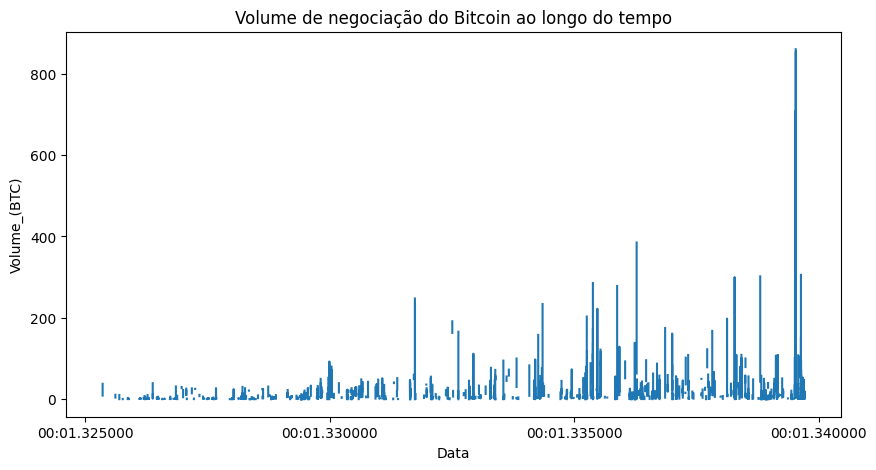

In [18]:
plt.figure(figsize=(10,5))
plt.plot(dados['Timestamp'], dados['Volume_(BTC)'])
plt.title('Volume de negociação do Bitcoin ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Volume_(BTC)')
plt.show()


In [20]:
correlation = dados['Close'].corr(dados['Volume_(BTC)'])
print(f'A correlação entre o preço de fechamento e o volume de Bitcoin negociado é {correlation}')


A correlação entre o preço de fechamento e o volume de Bitcoin negociado é -0.03602201175567134


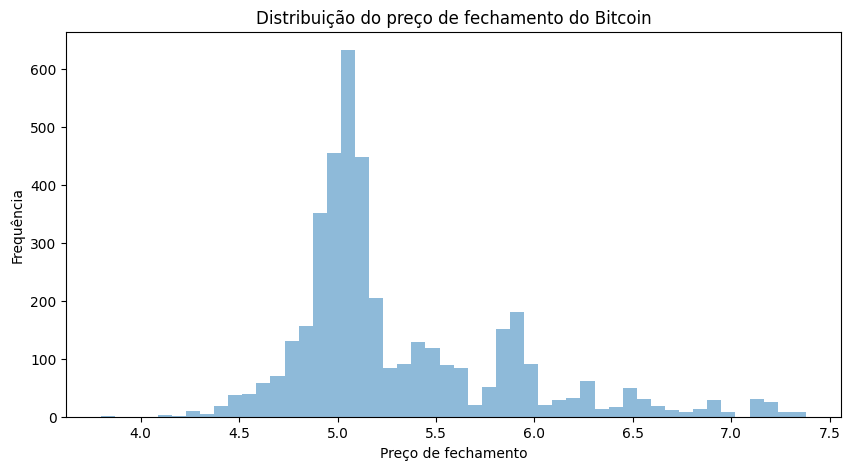

In [23]:
plt.figure(figsize=(10,5))
plt.hist(dados['Close'], bins=50, alpha=0.5)
plt.title('Distribuição do preço de fechamento do Bitcoin')
plt.xlabel('Preço de fechamento')
plt.ylabel('Frequência')
plt.show()


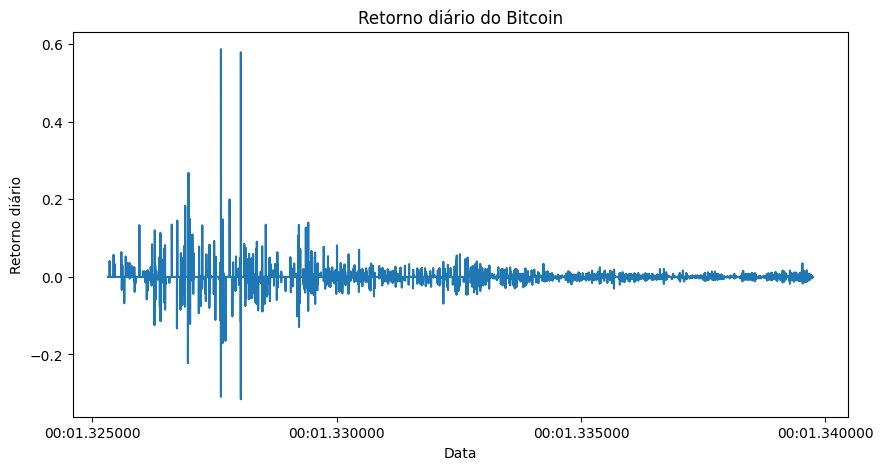

In [25]:
dados['Daily_Return'] = dados['Close'].pct_change()

plt.figure(figsize=(10,5))
plt.plot(dados['Timestamp'], dados['Daily_Return'])
plt.title('Retorno diário do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Retorno diário')
plt.show()


In [31]:
correlation = dados['Daily_Return'].corr(dados['Volume_(BTC)'])
print(f'A correlação entre o retorno diário e o volume de Bitcoin negociado é {correlation}')


A correlação entre o retorno diário e o volume de Bitcoin negociado é -0.008351276370372964


In [33]:
# Número total de blocos até o próximo halving
total_blocks = 210000

# Número atual de blocos (substitua pelo valor real)
current_blocks = dados.shape[0]

# Blocos restantes
remaining_blocks = total_blocks - current_blocks

print(f'Restam {remaining_blocks} blocos até o próximo halving.')


Restam -30343 blocos até o próximo halving.


In [35]:
# Volume médio de negociação antes do halving
average_volume_before = dados[dados['Timestamp'] < halving_date]['Volume_(BTC)'].mean()

# Volume médio de negociação depois do halving
average_volume_after = dados[dados['Timestamp'] > halving_date]['Volume_(BTC)'].mean()

print(f'O volume médio de negociação do Bitcoin antes do halving era {average_volume_before}.')
print(f'O volume médio de negociação do Bitcoin depois do halving é {average_volume_after}.')


O volume médio de negociação do Bitcoin antes do halving era 17.758945019917714.
O volume médio de negociação do Bitcoin depois do halving é nan.


In [36]:
# Data do próximo halving (substitua pela data real)
halving_date = pd.to_datetime('2024-03-12')

# Preço médio antes do halving
average_price_before = dados[dados['Timestamp'] < halving_date]['Close'].mean()

# Preço médio depois do halving
average_price_after = dados[dados['Timestamp'] > halving_date]['Close'].mean()

print(f'O preço médio do Bitcoin antes do halving era {average_price_before}.')
print(f'O preço médio do Bitcoin depois do halving é {average_price_after}.')


O preço médio do Bitcoin antes do halving era 5.3115755082284615.
O preço médio do Bitcoin depois do halving é nan.


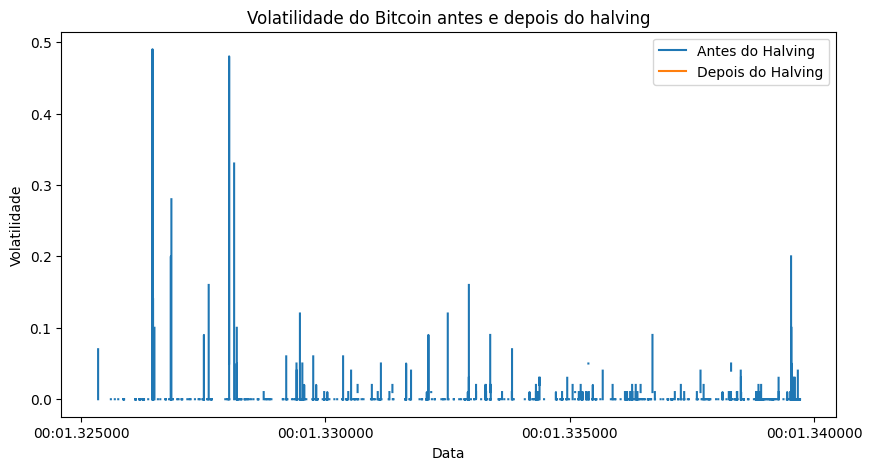

In [37]:
# Volatilidade antes do halving
volatility_before = dados[dados['Timestamp'] < halving_date]['High'] - dados[dados['Timestamp'] < halving_date]['Low']

# Volatilidade depois do halving
volatility_after = dados[dados['Timestamp'] > halving_date]['High'] - dados[dados['Timestamp'] > halving_date]['Low']

plt.figure(figsize=(10,5))
plt.plot(dados[dados['Timestamp'] < halving_date]['Timestamp'], volatility_before, label='Antes do Halving')
plt.plot(dados[dados['Timestamp'] > halving_date]['Timestamp'], volatility_after, label='Depois do Halving')
plt.title('Volatilidade do Bitcoin antes e depois do halving')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()
plt.show()


In [38]:
correlation_after = dados[dados['Timestamp'] > halving_date]['Close'].corr(dados[dados['Timestamp'] > halving_date]['Volume_(BTC)'])
print(f'A correlação entre o preço e o volume de negociação após o halving é {correlation_after}.')


A correlação entre o preço e o volume de negociação após o halving é nan.
